<a href="https://colab.research.google.com/github/Naomi0601/Simulacion/blob/main/Metodolog%C3%ADa_Simulacion_(periodicos).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Metodología de la Simulación (PERIODICOS)

---



### 1. Identifique las variables 

Aquellas cuyo comportamiento define el comportamiento o la evoución global del sistema real.

### 2. Determine la distribución de probabilidad

Elija el tipo de distribución de probabilidad que mejor defina el comportamiento aleatorio de cada una de las variables del sistema identificadas en el paso anterior.

### 3. Modele las variables aleatorias 

Cosntruya un modelo fiel de la aleatoriedad de las variables del sistema. Simular el comportamiento del sistema implica generar muestras aleatorias de cada variable que sigan fielmente la distribución de probabilidad correspondiente.

### 4. Defina el modelo del sistema y los objetivos de la simulación 

Fije los objetivos y diseñe un modelo del sistema real que abstraiga sus propiedades más relevantes. Todo error en el modelo (o su implementación computacional) puede dar lugar a conclusiones equivocadas. 

Antes de experimentar con el modelo, asegurarse de que refleja fielmente el sistema real **validando** el mismo a partir de datos reales, para ello compare los resultados obtenidos de la simulación con los producidos por el sistema.

### 5. Diseñe el experimento

Diseñe un experimento así como las ejecuciones concretas del mismo, los escenarios que desea estudiar para alcanzar los objetivos fijados. El experimento consiste en generar valores de las variables cuyo comportamiento define el comportamiento del sistema y analizar este ante dichos valores.

### 6. Repita el experimento $n$ veces 

Así dispondrá de $n$ observaciones sobre el comportamiento del sistema, lo que permitirá entender su funcionamiento así como evaluar el desempeño del mismo frente a los diversos escenarios establecidos.

El **método Monte Carlo** se basa en la **Ley Fuerte de los Grandes Números** y el **Teorema del Límite Central**.

## Ejercicio 3

Un quiosquero vende periodico a 1.10 euros cada uno.\
Cada periodico le cuesta 0.90 euros. Las ventas de periodicos a partir de su experiencia se refleja en la tabla siguiente: \

|Periodicos |**30**|**40**|**50**|**60**|**70**|
|-----------|------|------|------|------|------|
|   f(x)    |20%   | 25%  | 25%  | 20%  |10%   |

Teniendo en cuenta el costo de 0.20 euros por venta perdida y 0.10 euros por el reciclaje de cada periodico no vendido, determine el beneficio promedio diario si se pide 50 periodicos cada dia.

Por simulación: Construimos el modelo en varios pasos.

**PASO 1**. Defina las variables que intervienen en el modelo.

x=periodicos vendidos

**PASO 2**. Formule la distribución de probabilidad de cada variable.

|Periodicos |**30**|**40**|**50**|**60**|**70**|
|-----------|------|------|------|------|------|
|   f(x)    |0.20  | 0.25 | 0.25 | 0.20 |0.10  |

**PASO 3**. Enumere la distribución acumulada de probabilidad de cada variable.

|Periodicos |**30**|**40**|**50**|**60**|**70**|
|-----------|------|------|------|------|------|
|   f(x)    |0.20  | 0.25 | 0.25 | 0.20 |0.10  |
|F(x)       |0.20  | 0.45 | 0.70 | 0.90 |1.00  |

**PASO 4**. Establezca el intervalo de números aleatorios correspondiente a cada valor de cada una de las variables.

|Periodicos |**30**|**40**|**50**|**60**|**70**|
|-----------|------|------|------|------|------|
|   f(x)    |0.20  | 0.25 | 0.25 | 0.20 |0.10  |
|F(x)       |0.20  | 0.45 | 0.70 | 0.90 |1.00  |
|Intervalos |0.00 a 0.19|0.20 a 0.44|0.45 a 0.69|0.70 a 0.89|0.90 a 1.00|

**PASO 5**. Genere números aleatorios.

x=rd.random()

**PASO 6**. Simule un lanzamiento.

|**Dia** |**Numero aleatorio**|**Ventas simuladas**|**Ventas reales**|**Ventas pedidos**|**Periodicos no vendidos**|**Beneficios (euros)**|**Beeneficio promedio**|
|-----------|------|------|------|------|------|------|------|
| 1    |0.25 |40 | 40| 0 |10  | -2|-2|
|2|0.75|60|50|10|0|8|6

**PASO 7**. Obtenga la gráfica de estabilización que indica que el tamaño de muestra utilizado es suficiente para 
garantizar la convergencia del resultado.

In [ ]:
import random as rd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def ventas_sim():
  VS=0
  x=rd.random()

  if x>=0 and x<0.20:
    VS=30
  elif x>=0.20 and x<0.45:
    VS=40
  elif x>=0.45 and x< 0.70:
    VS=50
  elif x>=0.70 and x<0.90:
    VS=60
  elif x>=0.90 and x<=1.00:
    VS=70
  return VS

def beneficio(pedido):
 B=0
 VR=0
 VP=0
 NP=0
 vs=ventas_sim()
 if vs > pedido:
  VR=pedido
  VP=vs-pedido
  NP=0
 else:
  VR=vs
  VP=0
  NP=pedido-VR

 B=1.10*VR- 0.90*pedido - 0.10*NP - 0.20*VP
 return (B)   


In [ ]:
beneficio(50)

-2.0

In [ ]:
def simulacion(n):
  L=[]
  B=0
  for i in range(n):
    B+=beneficio(50)
    L.append(B/(i+1))
  return L

In [ ]:
X=simulacion(500)

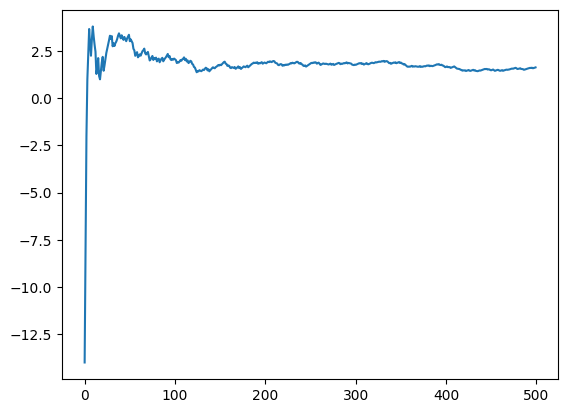

In [ ]:
plt.plot(X)

In [ ]:
np.mean(X)

1.8104236224931392

**PASO 8**. Replique el modelo.

In [ ]:
def modelo(n):
  lista=[]
  for i in range(n):
    s=simulacion(500)
    lista.append(np.mean(s))
  return lista

In [ ]:
Y=modelo(40)

**PASO 9**. Calcule la probabilidad su desviación estándar.

In [ ]:
print(np.mean(Y), np.std(Y))

1.418843648066852 0.5207958840103126


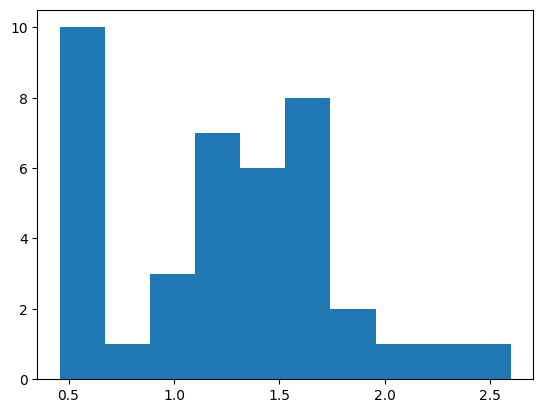

In [ ]:
plt.hist(Y)
plt.show()

**PASO 10**. Halle el intervalo de confianza de la probabilidad con un nivel de confianza del $95 \%$.

In [ ]:
from scipy.stats import norm
media=np.mean(Y)
de=np.std(Y, ddof=1)
con=0.95
IC=norm.interval(con, loc=media, scale=de/np.sqrt(len(Y)))

In [ ]:
print("Intervalo de confianza del 95%",IC)

Intervalo de confianza del 95% (1.0852891187584728, 1.4165699801309901)
